In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
from scipy.integrate import odeint
import pandas as pd
import seaborn
from scipy import stats

In [2]:
df = pd.read_csv('result_Transposase.csv')

In [3]:
print(np.size(df,0))#.Antimicrobial_resistance_chromosome[i]

34688


In [4]:
TransChro=np.zeros(np.size(df,0))
BioChro=np.zeros(np.size(df,0))
TransPlas=np.zeros(np.size(df,0))
BioPlas=np.zeros(np.size(df,0))
PlasNum=np.zeros(np.size(df,0))
for i in range(np.size(df,0)):
    TransChro[i]=df.Transposase_chromosome[i]
    BioChro[i]=df.biofilm_chromosome[i]
    TransPlas[i]=df.Transposase_plasmid[i]
    BioPlas[i]=df.biofilm_plasmid[i]
    PlasNum[i]=df.plasmid_count[i]

In [5]:
PP0TransPlas=[]
PP1TransPlas=[]
PP0TransPerPlas=[]
PP1TransPerPlas=[]
PP0TransChro=[]
PP1TransChro=[]
PP0TransTot=[]
PP1TransTot=[]


for i in range(len(BioChro)):
    if BioChro[i]+BioPlas[i]==0 and PlasNum[i]==0:
        #PP0TransPlas.append(TransPlas[i])
        PP0TransChro.append(TransChro[i])
        PP0TransTot.append(TransPlas[i]+TransChro[i])
    if BioChro[i]+BioPlas[i]==0 and PlasNum[i]>0:
        PP0TransPlas.append(TransPlas[i])
        PP0TransPerPlas.append(TransPlas[i]/PlasNum[i])
        PP0TransChro.append(TransChro[i])
        PP0TransTot.append(TransPlas[i]+TransChro[i])
    if BioChro[i]+BioPlas[i]>0 and PlasNum[i]==0:
        #PP1TransPlas.append(TransPlas[i])
        PP1TransChro.append(TransChro[i])
        PP1TransTot.append(TransPlas[i]+TransChro[i])
    if BioChro[i]+BioPlas[i]>0 and PlasNum[i]>0:
        PP1TransPlas.append(TransPlas[i])
        PP1TransPerPlas.append(TransPlas[i]/PlasNum[i])
        PP1TransChro.append(TransChro[i])
        PP1TransTot.append(TransPlas[i]+TransChro[i])

2.181649032486057e-63


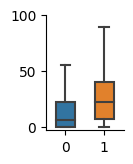

In [6]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0TransPlas,PP1TransPlas],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-3,100)
tstat, pval = stats.ttest_ind(a=PP0TransPlas, b=PP1TransPlas, alternative="two-sided")
plt.savefig('Transposase_1.pdf')
print(pval)

2.181649032486057e-63


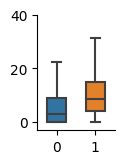

In [7]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0TransPerPlas,PP1TransPerPlas],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-3,40)
tstat, pval = stats.ttest_ind(a=PP0TransPlas, b=PP1TransPlas, alternative="two-sided")
plt.savefig('Transposase_2.pdf')
print(pval)

0.0014979703572722595


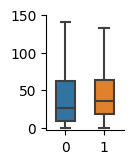

In [8]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0TransChro,PP1TransChro],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-3,150)
tstat, pval = stats.ttest_ind(a=PP0TransChro, b=PP1TransChro, alternative="two-sided")
plt.savefig('Transposase_3.pdf')
print(pval)

In [9]:
print(np.mean(PP0TransTot))

59.43962371972395


1.8917700198033407e-17


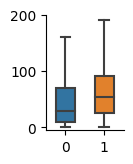

In [10]:
plt.figure(figsize=(1,1.5))
seaborn.boxplot([PP0TransTot,PP1TransTot],fliersize=0,width=0.5)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
plt.tick_params(direction='out')
plt.ylim(-5,200)
tstat, pval = stats.ttest_ind(a=PP0TransTot, b=PP1TransTot, alternative="two-sided")
plt.savefig('Transposase_4.pdf')
print(pval)